In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.cloud import bigquery
import pandas as pd
from scipy.stats import zscore
import numpy as np

# Import Transaction Data From Bigquery

In [34]:


def read_from_bigquery(project_id, dataset_id, table_id):
  
    # Set the environment variable for Google Cloud credentials
    os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/HP/Documents/VENDEASE/credentials.json'

    # Initialize BigQuery client
    client = bigquery.Client(project=project_id)

    # Construct the full table ID
    table_id = f"{project_id}.{dataset_id}.{table_id}"

    # Query to select all data from the specified table
    query = f"SELECT * FROM `{table_id}`"

    # Execute the query
    query_job = client.query(query)

    # Wait for the job to complete and retrieve the results
    results = query_job.result()

    # Convert the results to a Pandas DataFrame
    tran_df = results.to_dataframe()

    return tran_df

if __name__ == "__main__":
    # Define your BigQuery project, dataset, and table
    PROJECT_ID = 'data-auto-extraction'
    DATASET_ID = 'Vendease_partice'
    TABLE_ID = 'transactions'

    # Read data from BigQuery
    tran_df = read_from_bigquery(PROJECT_ID, DATASET_ID, TABLE_ID)

    # Display the first few rows of the DataFrame
    print(tran_df.head(2))


  Transaction ID  User ID Product ID                        Timestamp  \
0         TX1095      349      P1361 2024-07-21 16:34:28.907527+00:00   
1         TX1122      515      P1822 2024-07-22 03:57:55.907527+00:00   

   Transaction Value  
0                NaN  
1                NaN  


VALIDATING DATA INTEGRITY

In [35]:
tran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Transaction ID     717 non-null    object             
 1   User ID            717 non-null    Int64              
 2   Product ID         717 non-null    object             
 3   Timestamp          717 non-null    datetime64[us, UTC]
 4   Transaction Value  714 non-null    float64            
dtypes: Int64(1), datetime64[us, UTC](1), float64(1), object(2)
memory usage: 28.8+ KB


In [36]:
tran_df.describe()

,User ID,Transaction Value
count,717.0,714.000000
mean,515.156206,253.407577
std,288.040162,138.022956
min,9.0,10.110000
25%,273.0,138.910000
50%,515.0,244.885000
75%,752.0,374.355000
max,1000.0,499.360000


Check for missing values


Transaction ID       0
User ID              0
Product ID           0
Timestamp            0
Transaction Value    3
dtype: int64


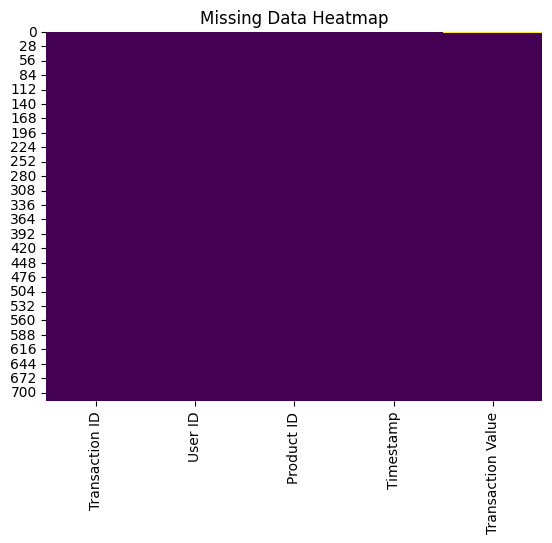

In [38]:
# Check for missing values
print(tran_df.isnull().sum())

# Visualize missing values (if any)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tran_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


Checking for  duplicate data


In [41]:
duplicates = tran_df.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

if duplicates.sum() > 0:
    print(tran_df[duplicates])


Number of duplicate rows: 0


Check for negative values in a column


In [45]:
if 'Session Duration' in tran_df.columns:
    print("Negative session durations:")
    print(tran_df[tran_df['Session Duration'] < 0])
    
else :
    print(None)


None


Checking Data types

In [50]:
data_types = tran_df.dtypes
print(data_types)


Transaction ID                    object
User ID                            Int64
Product ID                        object
Timestamp            datetime64[us, UTC]
Transaction Value                float64
dtype: object


 Z-score method for anomaly detection


In [61]:
from scipy.stats import zscore

if 'Session Duration' in tran_df.columns:
    z_scores = zscore(data['Session Duration'])
    anomalies = tran_df[np.abs(z_scores) > 3]  # Z-score > 3 is considered an anomaly
    print("Anomalies based on Z-score:")
    print(anomalies)
    
else:
    print("Nothing Discovered")


Nothing Discovered


# Import system_performance Data From Bigquery

In [11]:


def read_from_bigquery(project_id, dataset_id, table_id):
    # Set the environment variable for Google Cloud credentials
    os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/HP/Documents/VENDEASE/credentials.json'

    # Initialize BigQuery client
    client = bigquery.Client(project=project_id)

    # Construct the full table ID
    table_id = f"{project_id}.{dataset_id}.{table_id}"

    # Query to select all data from the specified table
    query = f"SELECT * FROM `{table_id}`"

    # Execute the query
    query_job = client.query(query)

    # Wait for the job to complete and retrieve the results
    results = query_job.result()

    # Convert the results to a Pandas DataFrame
    system_p = results.to_dataframe()

    return system_p

if __name__ == "__main__":
    # Define your BigQuery project, dataset, and table
    PROJECT_ID = 'data-auto-extraction'
    DATASET_ID = 'Vendease_partice'
    TABLE_ID = 'system_performance'

    # Read data from BigQuery
    system_p = read_from_bigquery(PROJECT_ID, DATASET_ID, TABLE_ID)

    # Display the first few rows of the DataFrame
    print(system_p.head(10))


                         Timestamp        Region  Response Time  Error Rate  \
0 2024-07-22 07:31:36.910716+00:00  AP-Southeast            194       0.023   
1 2024-07-22 07:30:36.910716+00:00       EU-West            171       0.049   
2 2024-07-22 07:29:36.910716+00:00       EU-West            391       0.034   
3 2024-07-22 07:28:36.910716+00:00       EU-West            132       0.033   
4 2024-07-22 07:27:36.910716+00:00  AP-Southeast            446       0.016   
5 2024-07-22 07:26:36.910716+00:00  AP-Southeast            471       0.018   
6 2024-07-22 07:25:36.910716+00:00  AP-Southeast            331       0.011   
7 2024-07-22 07:24:36.910716+00:00  AP-Southeast            120       0.026   
8 2024-07-22 07:23:36.910716+00:00       EU-West            399       0.007   
9 2024-07-22 07:22:36.910716+00:00  AP-Southeast            468       0.049   

   Server Load  
0         1.18  
1         1.05  
2         1.47  
3         1.41  
4         1.27  
5         0.86  
6         0

VALIDATING DATA INTEGRITY

In [51]:
system_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Timestamp      570 non-null    datetime64[us, UTC]
 1   Region         570 non-null    object             
 2   Response Time  570 non-null    Int64              
 3   Error Rate     570 non-null    float64            
 4   Server Load    570 non-null    float64            
dtypes: Int64(1), datetime64[us, UTC](1), float64(2), object(1)
memory usage: 22.9+ KB


In [52]:
system_p.describe()

,Response Time,Error Rate,Server Load
count,570.0,570.000000,570.000000
mean,301.149123,0.025279,0.993754
std,115.41785,0.013681,0.292048
min,100.0,0.000000,0.500000
25%,203.25,0.014000,0.752500
50%,308.5,0.025000,0.995000
75%,402.0,0.036000,1.250000
max,500.0,0.050000,1.500000


Check for missing values


Timestamp        0
Region           0
Response Time    0
Error Rate       0
Server Load      0
dtype: int64


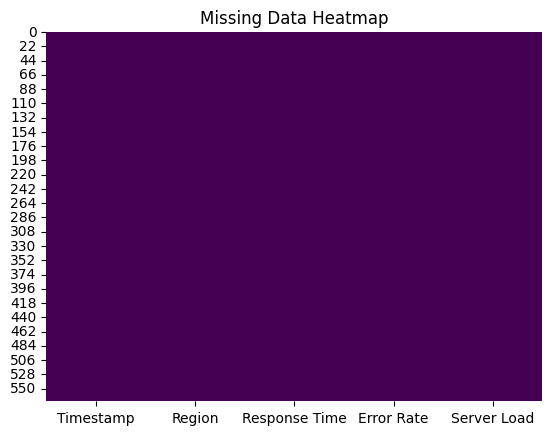

In [54]:
print(system_p.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(system_p.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


Checking for duplicate value

In [62]:
duplicates = system_p.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

if duplicates.sum() > 0:
    print(system_p[duplicates])


Number of duplicate rows: 0


 Check for negative values in a column


In [63]:
if 'Session Duration' in system_p.columns:
    print("Negative session durations:")
    print(system_p[system_p['Session Duration'] < 0])
    
else :
    print(None)


None


Checking The Data Types

In [64]:
data_types = system_p.dtypes
print(data_types)

Timestamp        datetime64[us, UTC]
Region                        object
Response Time                  Int64
Error Rate                   float64
Server Load                  float64
dtype: object


 Z-score method for anomaly detection


In [65]:

if 'Session Duration' in system_p.columns:
    z_scores = zscore(data['Session Duration'])
    anomalies = system_p[np.abs(z_scores) > 3]  # Z-score > 3 is considered an anomaly
    print("Anomalies based on Z-score:")
    print(anomalies)
    
else:
    print("Nothing Discovered")


Nothing Discovered


# Import system_performance Data From Bigquery

In [68]:


def read_from_bigquery(project_id, dataset_id, table_id):
   
    # Set the environment variable for Google Cloud credentials
    os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/HP/Documents/VENDEASE/credentials.json'

    # Initialize BigQuery client
    client = bigquery.Client(project=project_id)

    # Construct the full table ID
    table_id = f"{project_id}.{dataset_id}.{table_id}"

    # Query to select all data from the specified table
    query = f"SELECT * FROM `{table_id}`"

    # Execute the query
    query_job = client.query(query)

    # Wait for the job to complete and retrieve the results
    results = query_job.result()

    # Convert the results to a Pandas DataFrame
    user_In = results.to_dataframe()

    return user_In

if __name__ == "__main__":
    # Define your BigQuery project, dataset, and table
    PROJECT_ID = 'data-auto-extraction'
    DATASET_ID = 'Vendease_partice'
    TABLE_ID = 'user_interaction'

    # Read data from BigQuery
    user_In = read_from_bigquery(PROJECT_ID, DATASET_ID, TABLE_ID)

    # Display the first few rows of the DataFrame
    print(user_In.head(10))


   User ID    Action                        Timestamp Device Type  \
0      604      view 2024-07-21 06:02:33.903812+00:00      mobile   
1       71      view 2024-07-21 13:10:34.903812+00:00     desktop   
2      735  purchase 2024-07-21 14:35:48.903812+00:00     desktop   
3      601      view 2024-07-21 14:37:17.903812+00:00     desktop   
4      210     click 2024-07-21 23:23:42.903812+00:00      mobile   
5       92  purchase 2024-07-21 07:38:29.903812+00:00     desktop   
6      989      view 2024-07-21 18:41:27.903812+00:00     desktop   
7      654     click 2024-07-21 05:46:26.903812+00:00      tablet   
8      987      view 2024-07-21 12:56:33.903812+00:00     desktop   
9       76  purchase 2024-07-21 14:04:09.903812+00:00      mobile   

   Session Duration  
0               223  
1                65  
2               364  
3               508  
4               205  
5               296  
6               541  
7               194  
8               528  
9               499 

VALIDATING DATA INTEGRITY

In [69]:
user_In.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   User ID           644 non-null    Int64              
 1   Action            644 non-null    object             
 2   Timestamp         644 non-null    datetime64[us, UTC]
 3   Device Type       644 non-null    object             
 4   Session Duration  644 non-null    Int64              
dtypes: Int64(2), datetime64[us, UTC](1), object(2)
memory usage: 26.5+ KB


In [70]:
user_In.describe()

,User ID,Session Duration
count,644.0,644.0
mean,519.588509,316.215839
std,291.346544,159.190961
min,12.0,30.0
25%,259.0,188.75
50%,538.0,323.5
75%,770.0,449.5
max,1000.0,595.0


Check for missing values


User ID             0
Action              0
Timestamp           0
Device Type         0
Session Duration    0
dtype: int64


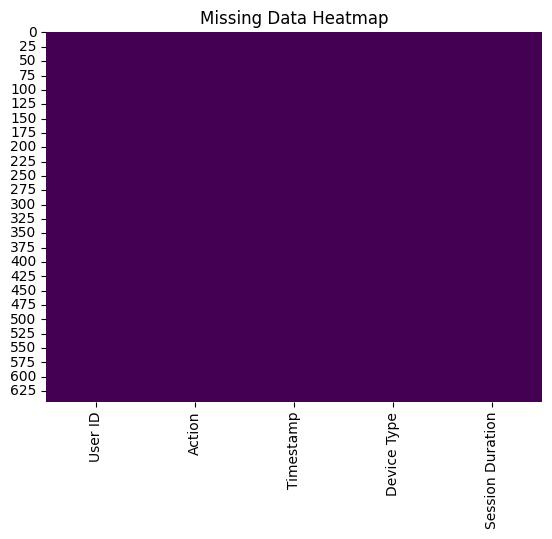

In [75]:
print(user_In.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(user_In.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


 Check for negative values in a column


In [80]:
if 'Session Duration' in system_p.columns:
    print("Negative session durations:")
    print(system_p[system_p['Session Duration'] < 0])
    
else :
    print(None)


None


Checking The Data Types

In [81]:
data_types = user_In.dtypes
print(data_types)

User ID                           Int64
Action                           object
Timestamp           datetime64[us, UTC]
Device Type                      object
Session Duration                  Int64
dtype: object


In [ ]:
 Z-score method for anomaly detection


In [85]:

if 'Session Duration' in user_In.columns:
    z_scores = zscore(user_In['Session Duration'])
    anomalies = user_In[np.abs(z_scores) > 3]  # Z-score > 3 is considered an anomaly
    print("Anomalies based on Z-score:")
    print(anomalies)
    
else:
    print("Nothing Discovered")


Anomalies based on Z-score:
Empty DataFrame
Columns: [User ID, Action, Timestamp, Device Type, Session Duration]
Index: []


# insight from user interacton data

In [20]:
device_counts = user_In["Device Type"].value_counts()
device_counts

Device Type
tablet     228
mobile     213
desktop    203
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


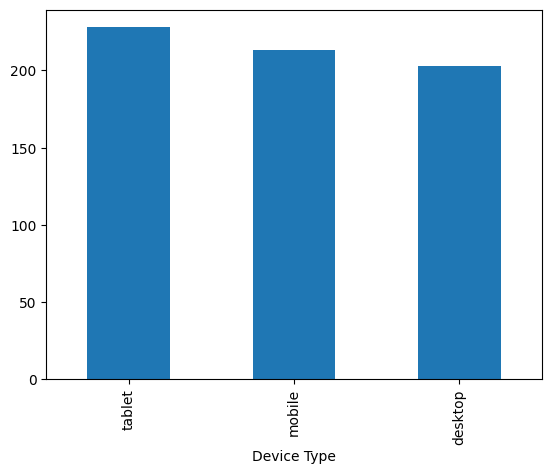

In [19]:
device_counts = user_In["Device Type"].value_counts().plot(kind="bar")
print(device_counts)


In [21]:
action_perform_counts = user_In["Action"].value_counts()
action_perform_counts

Action
click       218
purchase    214
view        212
Name: count, dtype: int64

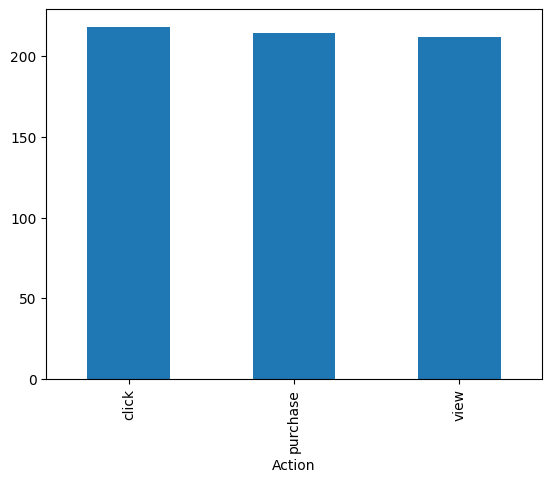

In [22]:
action_perform_counts = user_In["Action"].value_counts().plot(kind="bar")


In [ ]:
Most_buyer = 

<Axes: xlabel='User ID'>

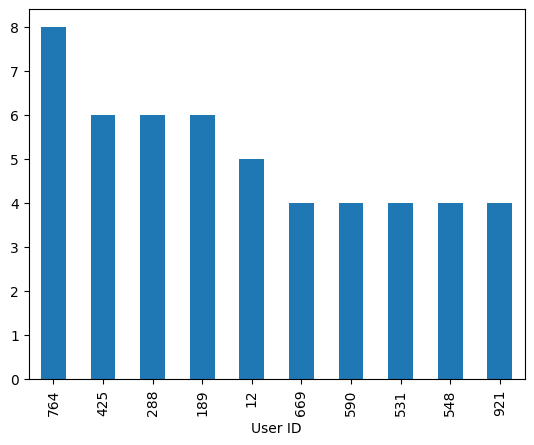

In [25]:
user = user_In["User ID"].value_counts().head(10).plot(kind="bar")
user

In [26]:
purchases = user_In[user_In["Action"] == "purchase"]

# Count the number of purchases per user
top_users = purchases.groupby(["User ID", "Device Type"]).size().reset_index(name="Purchase Count")

# Sort by purchase count and get the top 10
top_10_users = top_users.sort_values(by="Purchase Count", ascending=False).head(10)

# Display the result
print(top_10_users)


    User ID Device Type  Purchase Count
47      497      mobile               4
0        12     desktop               2
68      668     desktop               2
79      764      mobile               2
78      761     desktop               2
77      754      tablet               2
76      749     desktop               2
75      735     desktop               2
74      726      mobile               2
73      725     desktop               2


Discovering When Our Users Are Most Active

C:\Users\HP\AppData\Local\Temp\ipykernel_26812\3948432207.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  user_In['Hour'] = user_In['Timestamp'].dt.floor('H')


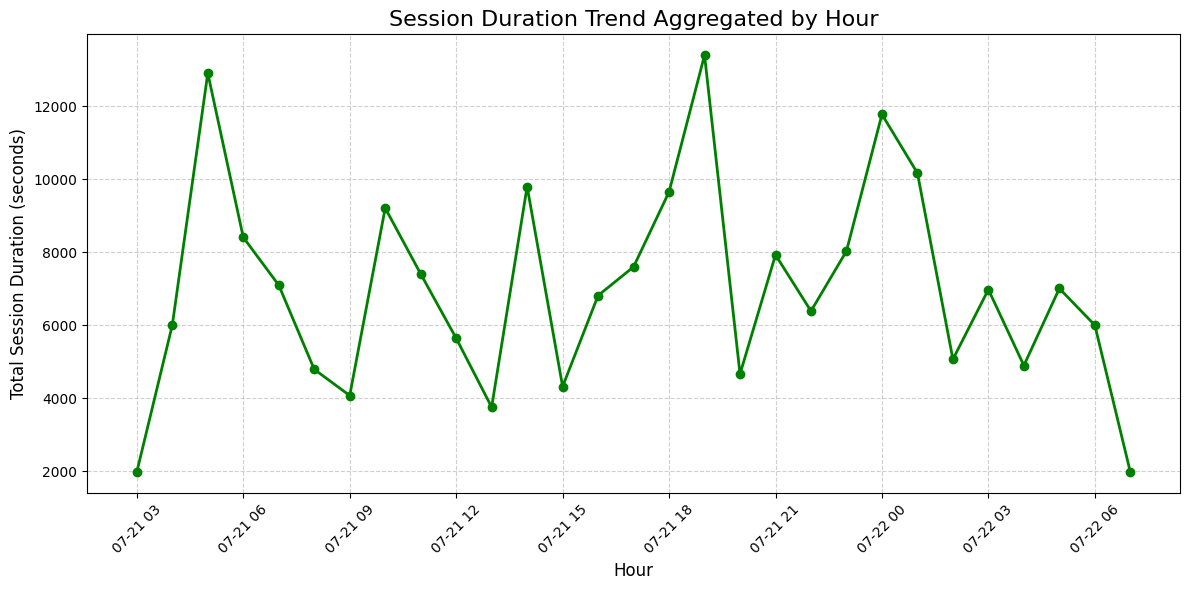

In [31]:
# Convert 'Timestamp' to a datetime object
user_In['Timestamp'] = pd.to_datetime(user_In['Timestamp'])

# Create a new column for hourly aggregation
user_In['Hour'] = user_In['Timestamp'].dt.floor('H')

# Aggregate session duration by hour
hourly_data = user_In.groupby('Hour')['Session Duration'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hourly_data['Hour'], hourly_data['Session Duration'], marker='o', linestyle='-', color='g', linewidth=2)

# Formatting the plot
plt.title('Session Duration Trend Aggregated by Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Total Session Duration (seconds)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

Heighest Activity Hours: Total Session Duration Across the Day

The hour with the longest total session duration is 5:00 with a total duration of 19906 seconds.


<Axes: title={'center': 'Total Session Duration by Hour of Day'}, xlabel='Hour', ylabel='Total Session Duration (seconds)'>

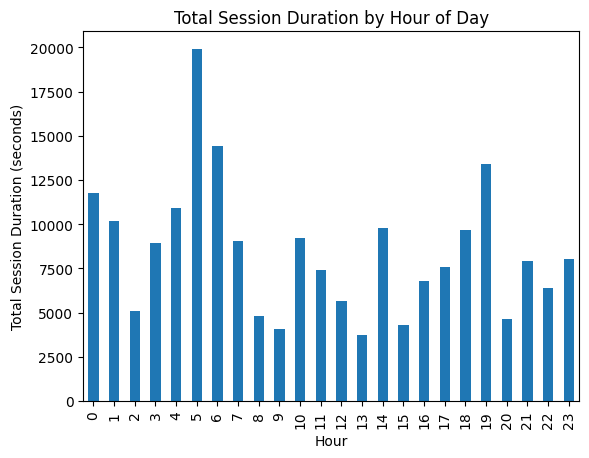

In [32]:

user_In['Hour'] = user_In['Timestamp'].dt.hour

hourly_session_duration = user_In.groupby('Hour')['Session Duration'].sum()

max_hour = hourly_session_duration.idxmax()
max_duration = hourly_session_duration.max()

print(f"The hour with the longest total session duration is {max_hour}:00 with a total duration of {max_duration} seconds.")

# Plot the session duration trend by hour
hourly_session_duration.plot(kind='bar', title='Total Session Duration by Hour of Day', xlabel='Hour', ylabel='Total Session Duration (seconds)')
